In [14]:
import numpy as np
import pandas as pd
import pyreadr 
import matplotlib.pyplot as plt
import seaborn as sns
import data_wrangle as dw

plt.style.use('seaborn-v0_8-colorblind')
# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)



In [15]:
# Read data 
all_schools = pyreadr.read_r('37070-0001-Data.rda')
all_schools = pd.DataFrame(all_schools['da37070.0001'])

# Clean data
df_cleaned = dw.clean_data(all_schools)
df_cleaned=df_cleaned[df_cleaned['SCHTREAT_NUMERIC']==1.0]
print(df_cleaned.shape)
print(df_cleaned.columns)

(11932, 39)
Index(['SCHID', 'SCHTREAT_NUMERIC', 'TREAT_NUMERIC', 'unique_id', 'ELIGIBLE',
       'WRISTOW2_NUMERIC', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5', 'ST6', 'ST7',
       'ST8', 'ST9', 'ST10', 'ST1W2', 'ST2W2', 'ST3W2', 'ST4W2', 'ST5W2',
       'ST6W2', 'ST7W2', 'ST8W2', 'ST9W2', 'ST10W2', 'BF1', 'BF2', 'GENC',
       'ETHW', 'ETHB', 'ETHH', 'ETHA', 'ETHC', 'ETHSA', 'GAME', 'GRC_6',
       'GRC_7', 'GRC_8'],
      dtype='object')


In [16]:
print("Number of eligible students:", df_cleaned['ELIGIBLE'].sum())
print("Number of schools:", df_cleaned['SCHID'].nunique())
print("Number of students:", df_cleaned.shape[0])


Number of eligible students: 1456
Number of schools: 28
Number of students: 11932


In [17]:
# Compute networks (for all schools)

# ST network 
ST_net = dw.network_by_school(df_cleaned, dw.ST_COLS, False)
ST_degrees = np.sum(ST_net, axis=1)

# ST2 network
ST2_net = dw.network_by_school(df_cleaned, dw.ST_W2_COLS, False)
ST2_degrees = np.sum(ST2_net, axis=1)

# BF network
BF_net = dw.network_by_school(df_cleaned, dw.BF_COLS, False)
BF_degrees = np.sum(BF_net, axis=1)


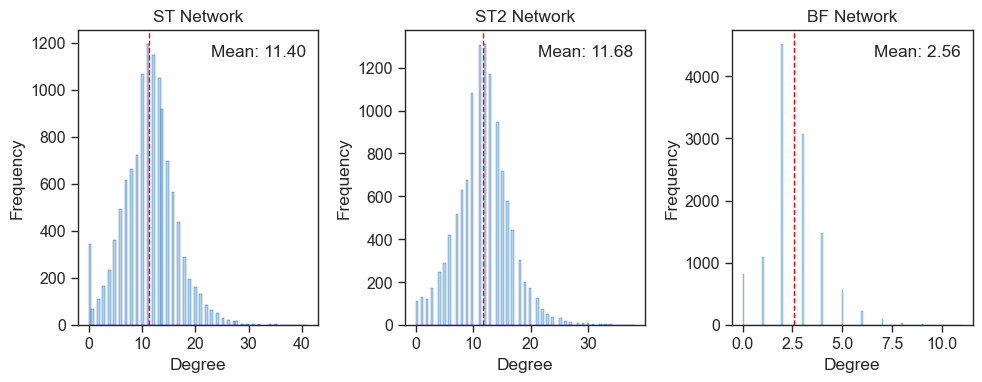

In [28]:
# plot networks

def plot_degree_distributions(degree_lists, names):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    # fig.suptitle("Degree Distributions", fontsize=16)
    
    for ax, degrees, name in zip(axes, degree_lists, names):
        sns.histplot(degrees, kde=False, ax=ax, color='skyblue', edgecolor='navy')
        
        ax.set_title(f"{name} Network")
        ax.set_xlabel("Degree")
        ax.set_ylabel("Frequency")
        
        # Add mean and median annotations
        mean = np.mean(degrees)
        # median = np.median(degrees)
        ax.axvline(mean, color='red', linestyle='dashed', linewidth=1)
        # ax.axvline(median, color='green', linestyle='dashed', linewidth=1)
        ax.text(0.95, 0.95, f'Mean: {mean:.2f}', 
                transform=ax.transAxes, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('data_degree_dist.png', dpi=1000)
    plt.show()
    
plot_degree_distributions([ST_degrees, ST2_degrees, BF_degrees], ["ST", "ST2", "BF"])
    